In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
path = os.getcwd() + '/ex1data1.txt'
df = pd.read_csv(path, header=None, names=['Population', 'Profit'])
#1
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
#2
x = df.values[:, 0]
y = df.values[:, 1]

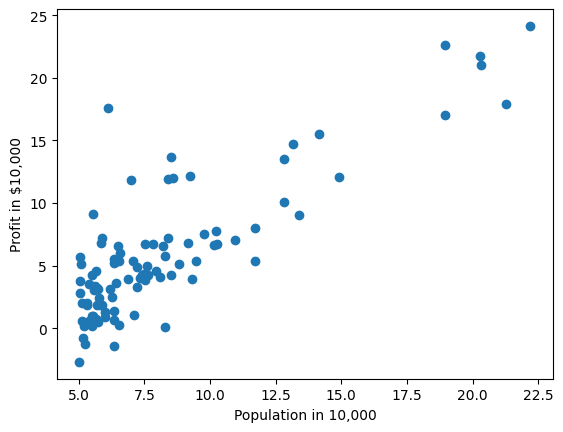

In [5]:
plt.scatter(x, y)
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in $10,000")
plt.show()

In [6]:
#3
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)

In [7]:
X.shape

(2, 97)

In [8]:
#4
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [9]:
theta.shape

(2, 1)

In [10]:
#5
def computeCost(X, y, theta):
    f = theta.transpose() @ X
    m = f.size
    return (1/(2*m))*((f-y)**2).sum()
#6
computeCost(X, y, theta)

32.072733877455676

In [11]:
#7
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    cost = np.zeros(it)
    m = y.size
    for i in range(it):
        h = theta.transpose() @ X
        for j in range(X.shape[0]):
            theta[j,0] -= alpha/m * ((h-y)*(X[j,:])).sum()
            # theta[j,0] -= alpha/m * ((h-y)*(temp)).sum()
        # theta[0,0] -= alpha/m * (h-y).sum()
        # theta[1,0] -= alpha/m * ((h-y)*x).sum()
        cost[i] = computeCost(X, y, theta)
    return theta, cost

alpha = 0.01
it = 1000

In [12]:
#8
theta, cost = simple_gradient(X, y, theta, alpha, it)
theta

array([[-3.2414012],
       [ 1.1272942]], dtype=float32)

In [13]:
#9
computeCost(X, y, theta)

4.515955615224579

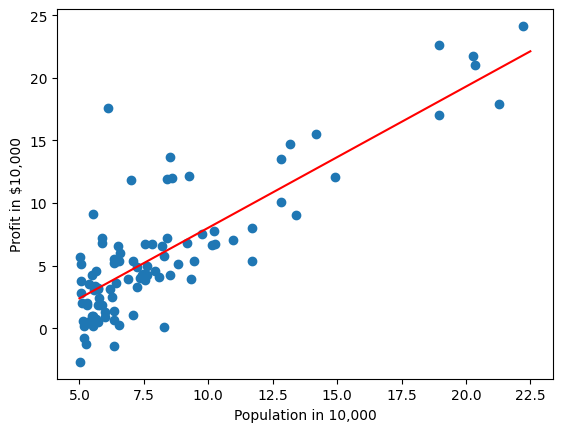

In [14]:
#10
plt.scatter(x, y)
x_val = np.linspace(5, 22.5)
y_val = theta[1] * x_val + theta[0]
plt.plot(x_val, y_val, "r")
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in $10,000")
plt.show()

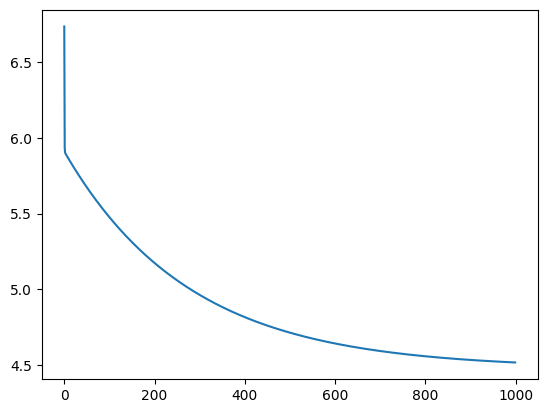

In [15]:
#11
plt.plot(range(it), cost)
plt.show()

In [16]:
path = os.getcwd() + '/ex1data2.txt'
df = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [17]:
df.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


<AxesSubplot: xlabel='Size', ylabel='Price'>

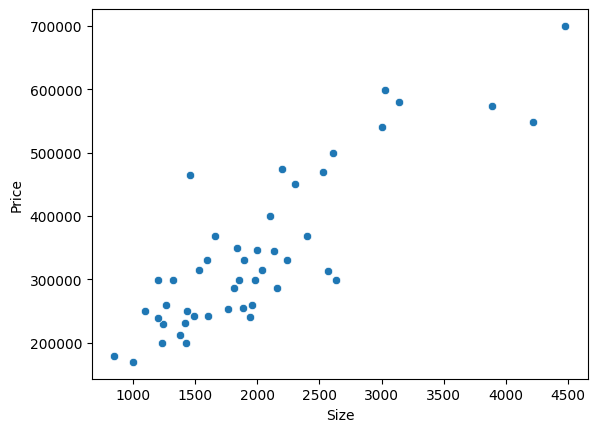

In [18]:
sns.scatterplot(x='Size', y='Price', data=df)

<AxesSubplot: xlabel='Bedrooms', ylabel='Price'>

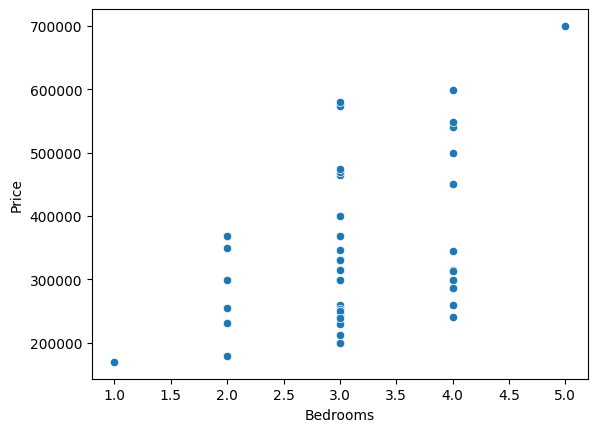

In [19]:
sns.scatterplot(x='Bedrooms', y='Price', data=df)

In [20]:

df["Size"] -= df["Size"].mean()
df["Size"] /= df["Size"].std()
df["Bedrooms"] -= df["Bedrooms"].mean()
df["Bedrooms"] /= df["Bedrooms"].std()
df["Price"] -= df["Price"].mean()
df["Price"] /= df["Price"].std()
df.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [21]:
#2
x = df.values[:, (0,1)]
y = df.values[:, 2]
x.shape, y.shape

((47, 2), (47,))

In [22]:
#3
X = np.concatenate([np.ones((x.shape[0], 1), dtype=np.float32), x], axis=1).T
X.shape

(3, 47)

In [23]:
#4
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)
theta.shape

(3, 1)

In [24]:
#8
alpha = 0.01
it = 1000
theta = np.zeros((X.shape[0], 1), dtype=np.float32)
theta, cost = simple_gradient(X, y, theta, alpha, it)
theta

array([[-1.10833606e-16],
       [ 8.78503442e-01],
       [-4.69166413e-02]], dtype=float32)

In [25]:
computeCost(X, y, theta)

0.13070337021769823

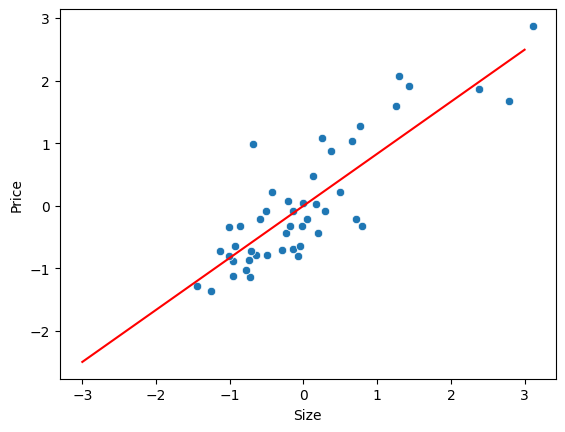

In [26]:
sns.scatterplot(x='Size', y='Price', data=df)
x_val = np.linspace(-3, 3)
y_val = theta[2] * x_val + theta[1] * x_val + theta[0]
plt.plot(x_val, y_val, "r")
plt.show()

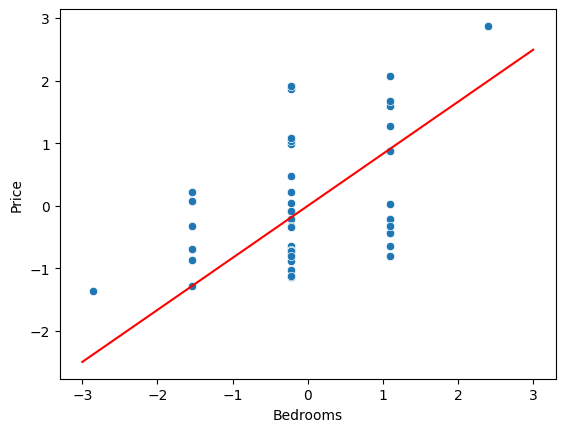

In [27]:
sns.scatterplot(x='Bedrooms', y='Price', data=df)
x_val = np.linspace(-3, 3)
y_val = theta[2] * x_val + theta[1] * x_val + theta[0]
plt.plot(x_val, y_val, "r")
plt.show()

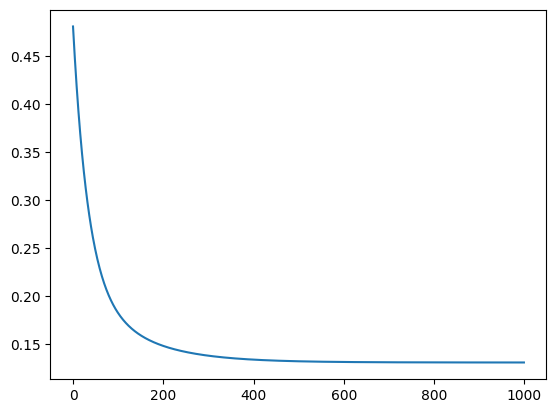

In [28]:
#11
plt.plot(range(it), cost)
plt.show()

In [29]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
 
# Data import
path = os.getcwd() + '/ex1data2.txt'
df = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
df.head()
 


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [30]:
# Normalization
df["Size"] -= df["Size"].mean()
df["Size"] /= df["Size"].std()
df["Bedrooms"] -= df["Bedrooms"].mean()
df["Bedrooms"] /= df["Bedrooms"].std()
df["Price"] -= df["Price"].mean()
df["Price"] /= df["Price"].std()
df.head()


,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [31]:
X = df.values[:, (0,1)]
y = df.values[:, 2]
 
# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [ 0.8333611  -0.01719408]
Residual sum of squares: 0.4867989165555058
